# Exploratory Data Analysis


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ROOT = Path.cwd().parent
CLEAN = ROOT / "data" / "clean"
plt.rcParams["figure.figsize"] = (8,4)

tx = pd.read_csv(CLEAN / "cleaned_transactions_v1.csv", parse_dates=["Date"])
cust = pd.read_csv(CLEAN / "cleaned_customers_v1.csv", parse_dates=["Customer_Since"])
prod = pd.read_csv(CLEAN / "cleaned_products_v1.csv")


In [12]:
display(tx.head())
tx.info()
display(tx.describe())


,TransactionID,CustomerID,Date,SKU,Quantity
0,PO-2024-10000,B2B-2734,2024-01-01,1128,2
1,PO-2024-10000,B2B-2734,2024-01-01,1275,2
2,PO-2024-10001,B2B-2154,2024-01-01,1078,19
3,PO-2024-10002,B2B-2398,2024-01-01,1270,1
4,PO-2024-10002,B2B-2398,2024-01-01,1143,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  50000 non-null  object        
 1   CustomerID     50000 non-null  object        
 2   Date           50000 non-null  datetime64[ns]
 3   SKU            50000 non-null  int64         
 4   Quantity       50000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.9+ MB


,Date,SKU,Quantity
count,50000,50000.000000,50000.000000
mean,2026-10-20 07:38:15.936000,1174.371020,9.500400
min,2024-01-01 00:00:00,1001.000000,1.000000
25%,2025-05-15 00:00:00,1065.000000,2.000000
50%,2026-10-19 00:00:00,1173.000000,4.000000
75%,2028-03-22 00:00:00,1270.000000,12.000000
max,2029-08-12 00:00:00,1370.000000,60.000000
std,NaN,115.750807,12.788935


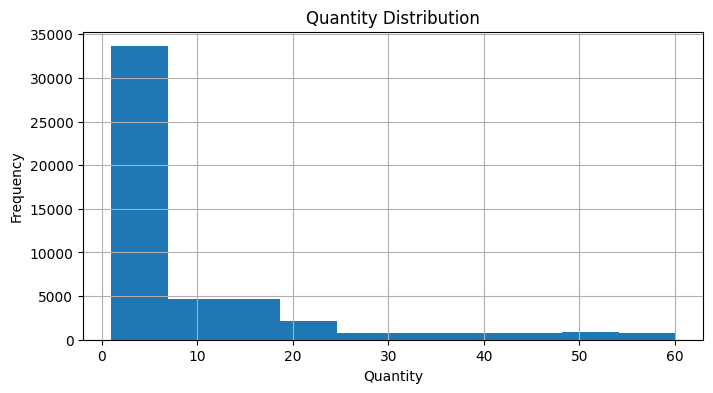

In [13]:
tx["Quantity"].hist()
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

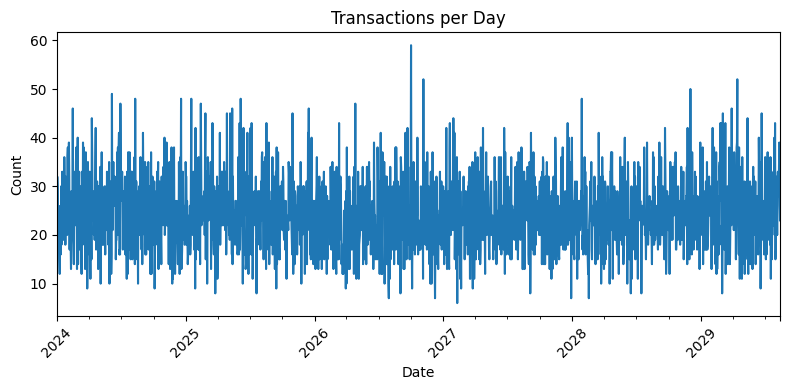

In [14]:
daily = tx.groupby("Date").size()
daily.plot()
plt.title("Transactions per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


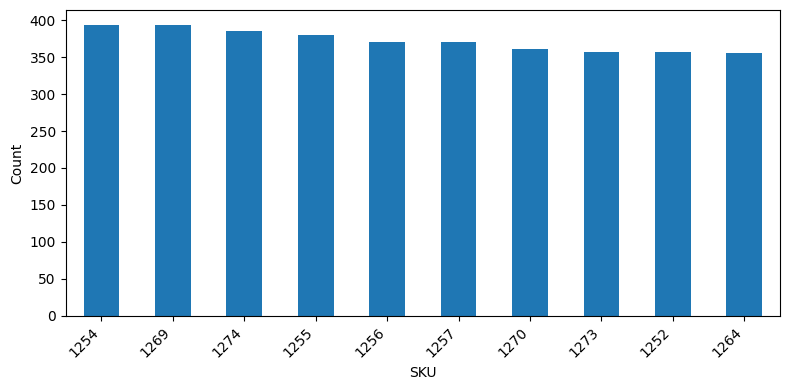

In [15]:
top_skus = tx["SKU"].value_counts().head(10)
top_skus.plot.bar()
plt.xlabel("SKU")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


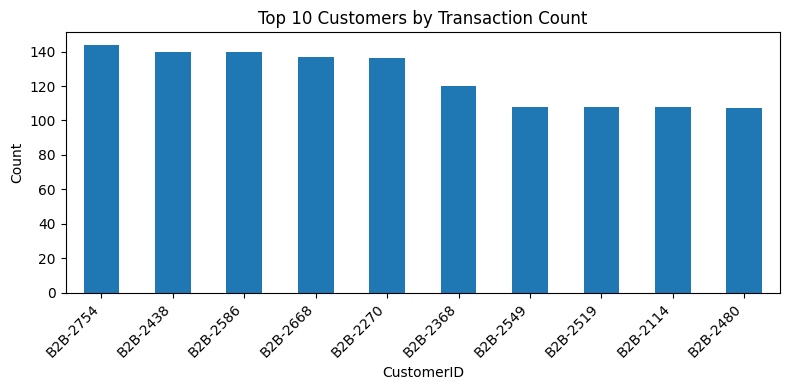

In [16]:
top_cust = tx["CustomerID"].value_counts().head(10)
top_cust.plot.bar()
plt.title("Top 10 Customers by Transaction Count")
plt.xlabel("CustomerID")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

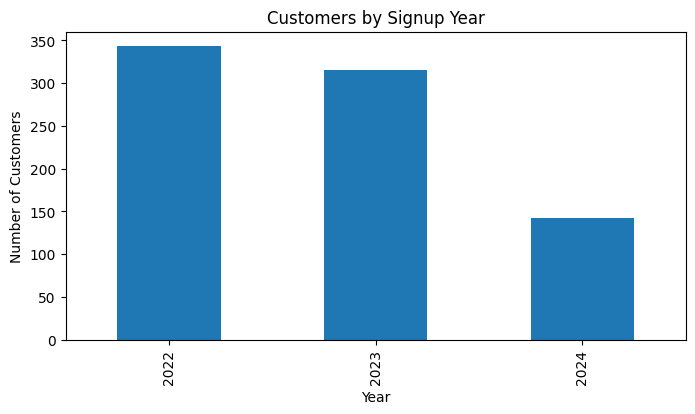

In [17]:
cust["Customer_Since"].dt.year.value_counts().sort_index().plot.bar()
plt.title("Customers by Signup Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()


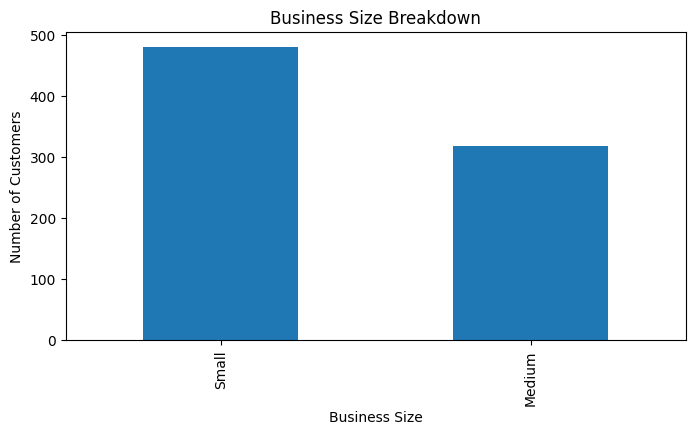

In [18]:
cust["Business_Size"].value_counts().plot.bar()
plt.title("Business Size Breakdown")
plt.xlabel("Business Size")
plt.ylabel("Number of Customers")
plt.show()


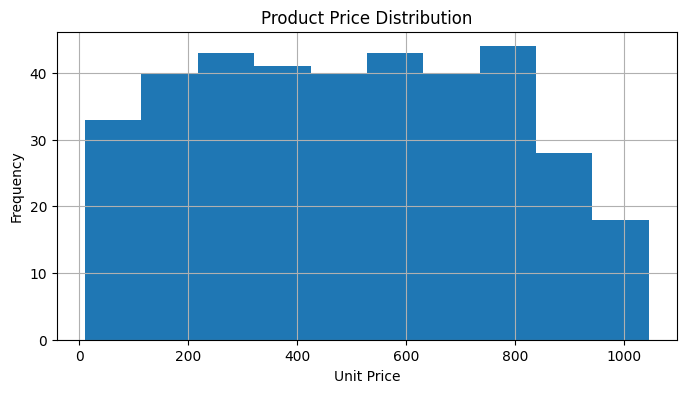

In [19]:
prod["Unit_Price"].hist()
plt.title("Product Price Distribution")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


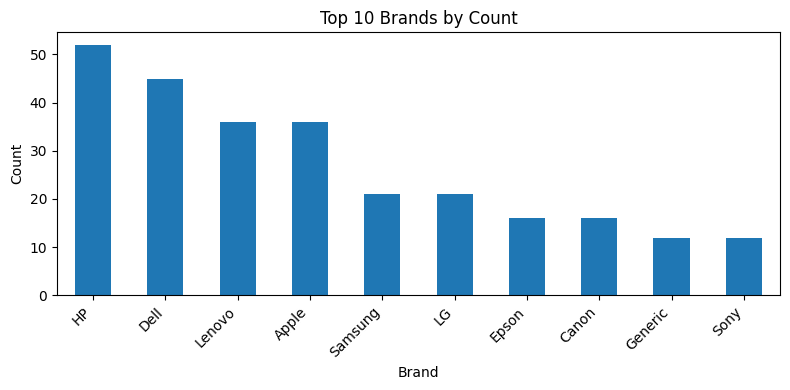

In [20]:
prod["Brand"].value_counts().head(10).plot.bar()
plt.title("Top 10 Brands by Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

